In [1]:
import pandas as pd
import transformers
import kagglehub
%matplotlib inline
import matplotlib.pyplot as plt

/Users/tyrone/gg-clip-vit/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
c = transformers.CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
v = transformers.ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")


In [2]:
TOKENIZER = transformers.AutoTokenizer.from_pretrained(
    "Qwen/Qwen2.5-VL-3B-Instruct", trust_remote_code=True
)

In [5]:
TOKENIZER.tokenize("hello", add_special_tokens=True)

['hello']

In [6]:
TOKENIZER.bos_token

In [7]:
TOKENIZER.eos_token

'<|im_end|>'

In [8]:
ids = TOKENIZER.encode("hello world", add_special_tokens=True)
print(ids, TOKENIZER.convert_ids_to_tokens(ids))

[14990, 1879] ['hello', 'Ġworld']


In [9]:
TOKENIZER

Qwen2TokenizerFast(name_or_path='Qwen/Qwen2.5-VL-3B-Instruct', vocab_size=151643, model_max_length=131072, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'eos_token': '<|im_end|>', 'pad_token': '<|endoftext|>', 'additional_special_tokens': ['<|im_start|>', '<|im_end|>', '<|object_ref_start|>', '<|object_ref_end|>', '<|box_start|>', '<|box_end|>', '<|quad_start|>', '<|quad_end|>', '<|vision_start|>', '<|vision_end|>', '<|vision_pad|>', '<|image_pad|>', '<|video_pad|>']}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	151643: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	151644: AddedToken("<|im_start|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	151645: AddedToken("<|im_end|>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	151646: AddedToken("<|object_ref_start|>", rstrip=False, lstrip=False, single_word=False

In [2]:
imagepath = kagglehub.dataset_download("adityajn105/flickr30k")


In [15]:
df = pd.read_csv(f"{imagepath}/captions.txt")

In [16]:
df.head()

,image,caption
0,1000092795.jpg,Two young guys with shaggy hair look at their...
1,1000092795.jpg,"Two young , White males are outside near many..."
2,1000092795.jpg,Two men in green shirts are standing in a yard .
3,1000092795.jpg,A man in a blue shirt standing in a garden .
4,1000092795.jpg,Two friends enjoy time spent together .


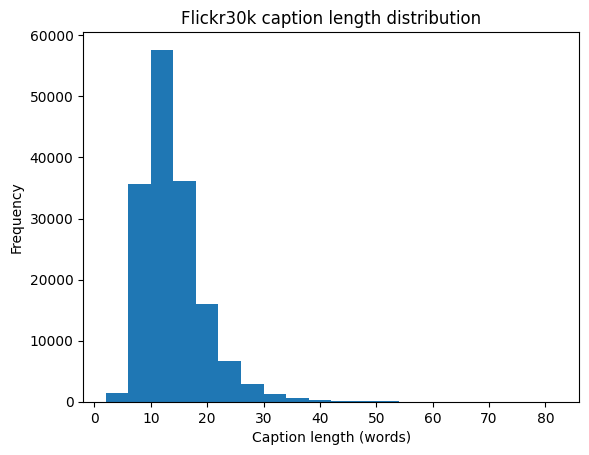

In [20]:
# word-level length for each caption
lengths = df["caption"].str.split().str.len()

plt.figure()                       # one plot, no sub-plots
plt.hist(lengths, bins=20)         # 20 buckets is usually enough
plt.xlabel("Caption length (words)")
plt.ylabel("Frequency")
plt.title("Flickr30k caption length distribution")
plt.show()

In [21]:
lengths.describe()

count    158914.000000
mean         13.389418
std           5.421043
min           2.000000
25%          10.000000
50%          12.000000
75%          16.000000
max          82.000000
Name: caption, dtype: float64

In [23]:
lengths.quantile(0.99)

np.float64(32.0)